# Code taken from https://github.com/prabh27/Quantum-Boltzmann-Machines/tree/main. Herein We only made updates of the classes, since they are deprecated.

Solution to pyquil https://stackoverflow.com/questions/61875869/ubuntu-20-04-upgrade-python-missing-libffi-so-6/63329830#63329830

It also check the manual https://pyquil-docs.rigetti.com/_/downloads/en/v2.9.1/pdf/ for install Quantum Virtual Machine (QVM). For connect to servidor QVM: qvm -S.

This notebook works together with qRBM_final.py script. You can find it in https://github.com/prabh27/Quantum-Boltzmann-Machines/blob/main/qRBM_final.py

# Coin Flip Experiment

In [2]:
from pyquil import Program                       # https://pyquil-docs.rigetti.com/en/stable/#

from qRBM_final import qRBM

from pyquil.gates import *
from random import *
import numpy as np
from sklearn import svm                          # https://scikit-learn.org/stable/modules/svm.html
from sklearn.neural_network import BernoulliRBM  # https://scikit-learn.org/stable/api/sklearn.neural_network.html
from matplotlib import pyplot as plt

from pyquil.api import WavefunctionSimulator     # https://pyquil-docs.rigetti.com/en/stable/wavefunction_simulator.html

## Creating the underlying distribution
Generate a sequence, this will be the underlying hidden distribution of our data.

In [3]:
#flip a coin
np.random.seed(1234)
random_coin = np.random.choice([0,1], size=20, replace=True)
random_coin

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

The probabilities of our data will be parsed in a quantum circuit (Bell state)

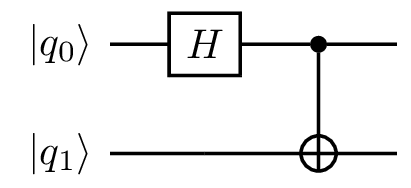

In [4]:
from pyquil.latex import display
from pyquil import Program
from pyquil.gates import H

qvm = WavefunctionSimulator()  # https://pyquil-docs.rigetti.com/en/stable/wavefunction_simulator.html
p = Program()
p.inst(H(0), CNOT(0, 1))       # circuit 

r = qRBM(qvm, num_visible=4, num_hidden=1, n_quantum_measurements=None, verbose=True)
display(p)

## Generating encoded sequences
That information will be encoded within a set of four numbers, for example 0 will be represented as (1,1,-1,-1), while
1 as (-1,-1,1,1). This will create artificial data where we will hide information that the QRBM algorithm must decode

In [5]:
# Encode this coin flip into an artifically high dimensional dataset
artificial_data = []
for flip in random_coin:
    if flip == 1:
        artificial_data.append([-1,-1,1,1]) #logical 1
    else:
        artificial_data.append([1,1,-1,-1]) #logical 0

# We know have an artificially high dimensional dataset 
artificial_data = np.asarray(artificial_data)
artificial_data

array([[-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [ 1,  1, -1, -1],
       [-1, -1,  1,  1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [-1, -1,  1,  1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [-1, -1,  1,  1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1],
       [ 1,  1, -1, -1]])

## Creating and training our QRBM

In [6]:
# We will now setup our QRBM to try and understand the artifical data's underlying distribution

# we will use "analytical" measurement to save time on simulation.
qr = qRBM(qvm, num_visible=4, num_hidden=1,n_quantum_measurements=None)

In [7]:
%%capture
# let it train...
qr.train(artificial_data,n_epochs=51)     # Herein the n_epochs by default is 100

## Comparing QRBM decoded data to originally encoded data
In the following code snippet we examine the hidden variables probabilities and how they correspond to the initial information from the coin flip. As we can note that the model is able to predict either 0 or 1.

In [8]:
# we can transform our data to the hidden layer
transformed = qr.transform(artificial_data)

comparison = np.stack((transformed[:,0], random_coin))

#compare our rbm probabilities with the coin flips.
print ('QRBM Pr. | Original Coin Value')
print ('-'*30)
for i in range(len(transformed)):
    print ('{: 0.3f}'.format(float(comparison[:,i][0])), ' |', '{: 0.3f}'.format(comparison[:,i][1]))


QRBM Pr. | Original Coin Value
------------------------------
 0.000  |  1.000
 0.000  |  1.000
 1.000  |  0.000
 0.000  |  1.000
 1.000  |  0.000
 1.000  |  0.000
 1.000  |  0.000
 0.000  |  1.000
 0.000  |  1.000
 0.000  |  1.000
 0.000  |  1.000
 0.000  |  1.000
 1.000  |  0.000
 1.000  |  0.000
 0.000  |  1.000
 1.000  |  0.000
 1.000  |  0.000
 1.000  |  0.000
 1.000  |  0.000
 1.000  |  0.000
